#### Descrição do dataset

Link: https://archive.ics.uci.edu/dataset/352/online+retail

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import probplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.eval_measures import aic, bic
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
# Comentário já existente no código (mantido)
# #1. Carregando os dados da série de vendas diárias
# Comentário já existente no código (mantido)
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
# Comentário já existente no código (mantido)
# df = pd.read_excel(url)

In [68]:
# Comentário já existente no código (mantido)
# #Reamostrando os dados originais
# Comentário já existente no código (mantido)
# df_sampled = df.sample(frac=0.6)
# Comentário já existente no código (mantido)
# df_sampled.to_csv("Online_Retail_Sampled.csv", index=False)

In [69]:
# Comentário já existente no código (mantido)
# df = pd.read_excel("Online Retail.xlsx")
# Comentário já existente no código (mantido)
# df.head()

In [70]:
# Lê dados de um arquivo CSV/TSV para um DataFrame
df = pd.read_csv("Online_Retail_Sampled.csv")
# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559491,20665,RED RETROSPOT PURSE,1,2011-07-08 13:53:00,5.79,NaN,United Kingdom
1,576837,22990,COTTON APRON PANTRY DESIGN,1,2011-11-16 15:16:00,10.79,NaN,United Kingdom
2,581238,22114,HOT WATER BOTTLE TEA AND SYMPATHY,42,2011-12-08 10:53:00,8.29,NaN,United Kingdom
3,558116,82482,WOODEN PICTURE FRAME WHITE FINISH,3,2011-06-27 09:11:00,4.96,NaN,United Kingdom
4,540546,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2011-01-09 15:56:00,1.25,12766.0,Portugal


### EDA - Análise Exploratória de Dados

In [71]:
# Comentário já existente no código (mantido)
#checagem inicial dos dados
# Mostra informações gerais do DataFrame (tipos de dados, nulos, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325145 entries, 0 to 325144
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    325145 non-null  object 
 1   StockCode    325145 non-null  object 
 2   Description  324278 non-null  object 
 3   Quantity     325145 non-null  int64  
 4   InvoiceDate  325145 non-null  object 
 5   UnitPrice    325145 non-null  float64
 6   CustomerID   244039 non-null  float64
 7   Country      325145 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ MB


In [72]:
# Comentário já existente no código (mantido)
# Tratamento básico dos dados
# Atribui/atualiza a variável 'df'
df = df.dropna(subset=['CustomerID']) #removendo os NaNs
# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,540546,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2011-01-09 15:56:00,1.25,12766.0,Portugal
5,538250,77101A,UNION FLAG WINDSOCK,1,2010-12-10 12:20:00,1.25,18118.0,United Kingdom
6,545691,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-03-06 12:52:00,2.95,14161.0,United Kingdom
7,566625,23397,FOOT STOOL HOME SWEET HOME,2,2011-09-14 09:38:00,9.95,14911.0,EIRE
8,562129,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-03 09:09:00,2.95,13186.0,United Kingdom


In [73]:
# Comentário já existente no código (mantido)
#tentando converter a coluna "InvoiceNo" para datatype integer
# Linha de código Python executável
df['InvoiceNo'].astype(int)

ValueError: invalid literal for int() with base 10: 'C550810'

In [74]:
# Comentário já existente no código (mantido)
#Checando por letras 
# Linha de código Python executável
df[ df['InvoiceNo'].astype(str).str.startswith('C') ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
25,C550810,22654,DELUXE SEWING KIT,-2,2011-04-20 15:58:00,5.95,15135.0,United Kingdom
245,C540392,22244,3 HOOK HANGER MAGIC GARDEN,-1,2011-01-06 18:06:00,1.95,12753.0,Japan
294,C559347,M,Manual,-1,2011-07-07 17:22:00,2.88,18072.0,United Kingdom
368,C546930,21743,STAR PORTABLE TABLE LIGHT,-4,2011-03-18 10:37:00,2.95,14701.0,United Kingdom
370,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2011-01-09 14:17:00,1.25,15005.0,United Kingdom
...,...,...,...,...,...,...,...,...
324958,C581466,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-12-08 19:20:00,4.95,13883.0,United Kingdom
324978,C540942,22423,REGENCY CAKESTAND 3 TIER,-3,2011-01-12 12:30:00,10.95,13113.0,United Kingdom
325040,C569233,22350,ILLUSTRATED CAT BOWL,-1,2011-10-02 15:26:00,2.55,17841.0,United Kingdom
325052,C576816,POST,POSTAGE,-1,2011-11-16 14:24:00,18.00,12569.0,Germany


In [75]:
# Comentário já existente no código (mantido)
#Limpando os dados com "C" da feature "InvoiceNo"
# Atribui/atualiza a variável 'df'
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,540546,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2011-01-09 15:56:00,1.25,12766.0,Portugal
5,538250,77101A,UNION FLAG WINDSOCK,1,2010-12-10 12:20:00,1.25,18118.0,United Kingdom
6,545691,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-03-06 12:52:00,2.95,14161.0,United Kingdom
7,566625,23397,FOOT STOOL HOME SWEET HOME,2,2011-09-14 09:38:00,9.95,14911.0,EIRE
8,562129,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-03 09:09:00,2.95,13186.0,United Kingdom


In [76]:
# Comentário já existente no código (mantido)
#tentando passar a coluna "InvoiceDate" para datatype temporal
# Atribui/atualiza a variável 'df['InvoiceDate']'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Linha de código Python executável
df['InvoiceDate']

4        2011-01-09 15:56:00
5        2010-12-10 12:20:00
6        2011-03-06 12:52:00
7        2011-09-14 09:38:00
8        2011-08-03 09:09:00
                 ...        
325138   2011-07-18 11:58:00
325140   2011-02-02 15:22:00
325141   2011-03-23 14:00:00
325142   2011-10-24 11:56:00
325143   2011-11-16 12:08:00
Name: InvoiceDate, Length: 238722, dtype: datetime64[ns]

In [77]:
# Linha de código Python executável
df.set_index('InvoiceDate').resample("D")["Quantity"].sum()

InvoiceDate
2010-12-01    13605
2010-12-02    20454
2010-12-03     5963
2010-12-04        0
2010-12-05    10173
              ...  
2011-12-05    22871
2011-12-06    16905
2011-12-07    26881
2011-12-08    17343
2011-12-09    86926
Freq: D, Name: Quantity, Length: 374, dtype: int64

In [78]:
# Comentário já existente no código (mantido)
# Vendas diárias (agregado)
# Atribui/atualiza a variável 'df_daily'
df_daily = df.set_index('InvoiceDate').resample('D')['Quantity'].sum()
# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df_daily.head()

InvoiceDate
2010-12-01    13605
2010-12-02    20454
2010-12-03     5963
2010-12-04        0
2010-12-05    10173
Freq: D, Name: Quantity, dtype: int64

In [79]:
# Linha de código Python executável
df_daily.isna().any()

False

In [80]:
# Atribui/atualiza a variável 'df_daily'
df_daily = df_daily.fillna(0)

In [81]:
# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df_daily.head()

InvoiceDate
2010-12-01    13605
2010-12-02    20454
2010-12-03     5963
2010-12-04        0
2010-12-05    10173
Freq: D, Name: Quantity, dtype: int64

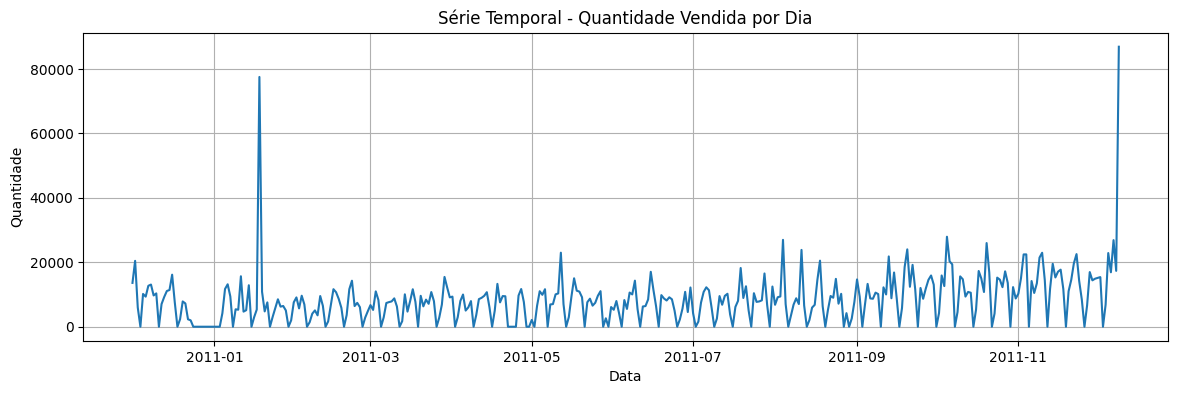

In [82]:
# Comentário já existente no código (mantido)
# 2. Visualização geral
# Comandos de plotagem com Matplotlib
plt.figure(figsize=(14, 4))
# Gera um gráfico a partir dos dados
plt.plot(df_daily)
# Comandos de plotagem com Matplotlib
plt.title('Série Temporal - Quantidade Vendida por Dia')
# Comandos de plotagem com Matplotlib
plt.xlabel('Data')
# Comandos de plotagem com Matplotlib
plt.ylabel('Quantidade')
# Comandos de plotagem com Matplotlib
plt.grid(True)
# Comandos de plotagem com Matplotlib
plt.show()

1. Tendência geral:
Há uma tendência levemente crescente ao longo do tempo.
O volume de vendas diárias parece mais alto no segundo semestre, especialmente a partir de setembro/outubro.

2. Volatilidade (variação):
A série apresenta alta variabilidade ao longo do tempo.
Existem dias com vendas bem próximas de zero e outros com picos altíssimos.

3. Outliers / Picos anômalos:
Dois grandes picos fora do padrão chamam atenção:
Um no início do ano (por volta de jan/fev 2011)
Outro ainda maior no fim do ano (dez/2011)
Esses valores são muito acima da média e podem afetar modelos que não lidam bem com valores extremos (como SARIMA e regressões).

4. Sazonalidade visual:
A olho nu, não é possível identificar uma sazonalidade clara semanal ou mensal nesse gráfico.
A série parece ser quase ruidosa, mas com saltos e padrões que precisam ser investigados com decomposição ou ACF/PACF.

Próximos passos: aplicar suavização (rolling mean) para ver padrões mais nítidos.

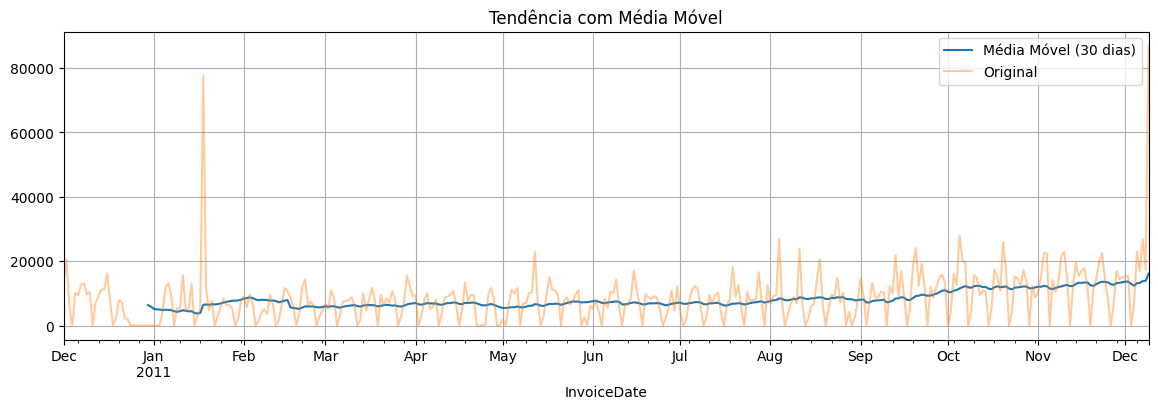

In [83]:
# Comentário já existente no código (mantido)
# 3. Verificar tendência com média móvel
# Gera um gráfico a partir dos dados
df_daily.rolling(window=30).mean().plot(label='Média Móvel (30 dias)', figsize=(14,4))
# Gera um gráfico a partir dos dados
plt.plot(df_daily, alpha=0.4, label='Original')
# Comandos de plotagem com Matplotlib
plt.title('Tendência com Média Móvel')
# Comandos de plotagem com Matplotlib
plt.legend()
# Comandos de plotagem com Matplotlib
plt.grid(True)
# Comandos de plotagem com Matplotlib
plt.show()

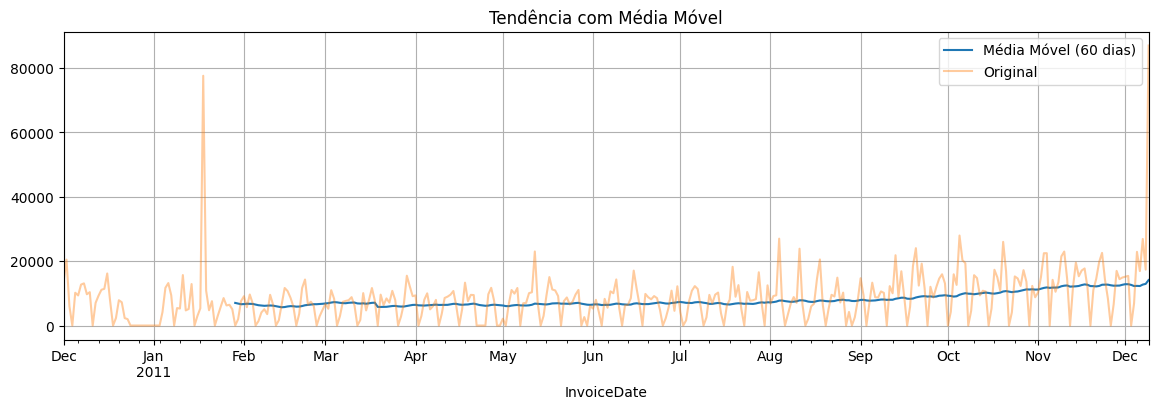

In [84]:
# Comentário já existente no código (mantido)
#Tentando uma média móvel de 60 dias
# Gera um gráfico a partir dos dados
df_daily.rolling(window=60).mean().plot(label='Média Móvel (60 dias)', figsize=(14,4))
# Gera um gráfico a partir dos dados
plt.plot(df_daily, alpha=0.4, label='Original')
# Comandos de plotagem com Matplotlib
plt.title('Tendência com Média Móvel')
# Comandos de plotagem com Matplotlib
plt.legend()
# Comandos de plotagem com Matplotlib
plt.grid(True)
# Comandos de plotagem com Matplotlib
plt.show()

In [85]:
# Comentário já existente no código (mantido)
# Vendas diárias (agregado)
# Atribui/atualiza a variável 'df_daily'
df_daily = df.set_index('InvoiceDate').resample('D')['Quantity'].sum()
# Atribui/atualiza a variável 'df_daily'
df_daily = df_daily.fillna(0)

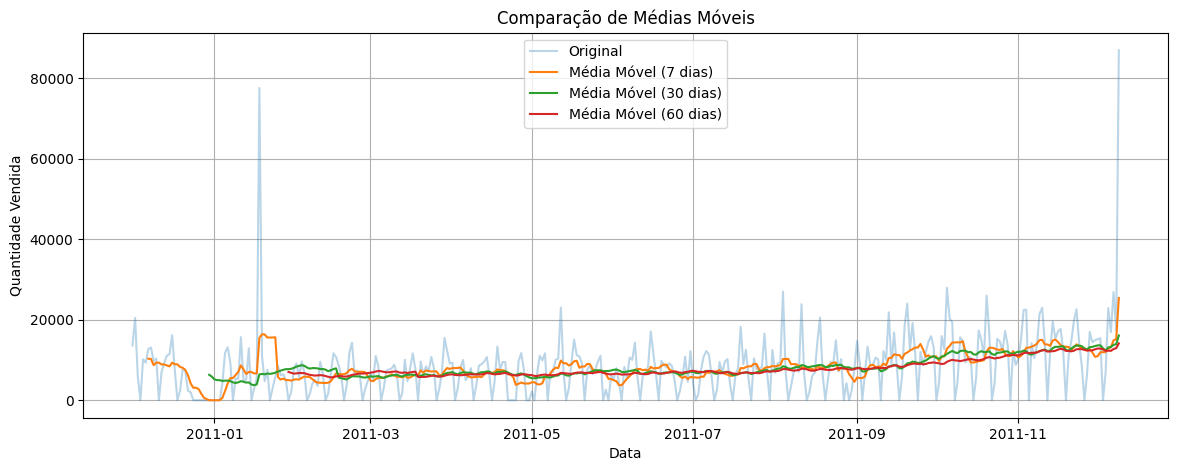

In [86]:
# Comandos de plotagem com Matplotlib
plt.figure(figsize=(14,5))
# Gera um gráfico a partir dos dados
plt.plot(df_daily, alpha=0.3, label='Original')
# Gera um gráfico a partir dos dados
plt.plot(df_daily.rolling(7).mean(), label='Média Móvel (7 dias)')
# Gera um gráfico a partir dos dados
plt.plot(df_daily.rolling(30).mean(), label='Média Móvel (30 dias)')
# Gera um gráfico a partir dos dados
plt.plot(df_daily.rolling(60).mean(), label='Média Móvel (60 dias)')
# Comandos de plotagem com Matplotlib
plt.title('Comparação de Médias Móveis')
# Comandos de plotagem com Matplotlib
plt.xlabel('Data')
# Comandos de plotagem com Matplotlib
plt.ylabel('Quantidade Vendida')
# Comandos de plotagem com Matplotlib
plt.legend()
# Comandos de plotagem com Matplotlib
plt.grid()
# Comandos de plotagem com Matplotlib
plt.show()

- Apesar dos distintos níveis de suavização das médias móveis, em geral todas mostram uma tendência de crescimento ao longo do ano.

#### Agora vamos investigar a componente sazonal e a estacionaridade dos dados

In [87]:
# Comentário já existente no código (mantido)
# Criando DataFrame com coluna Quantity e índice
# Atribui/atualiza a variável 'df_box'
df_box = pd.DataFrame({'Quantity': df_daily.values}, index=df_daily.index)
# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df_box.head()

,Quantity
InvoiceDate,
2010-12-01,13605
2010-12-02,20454
2010-12-03,5963
2010-12-04,0
2010-12-05,10173


In [88]:
# Comentário já existente no código (mantido)
#Nova coluna com os dias da semana
# Atribui/atualiza a variável 'df_box['weekday']'
df_box['weekday'] = df_box.index.dayofweek

# Visualiza as primeiras linhas do DataFrame para inspeção rápida
df_box.head()

,Quantity,weekday
InvoiceDate,,
2010-12-01,13605,2
2010-12-02,20454,3
2010-12-03,5963,4
2010-12-04,0,5
2010-12-05,10173,6


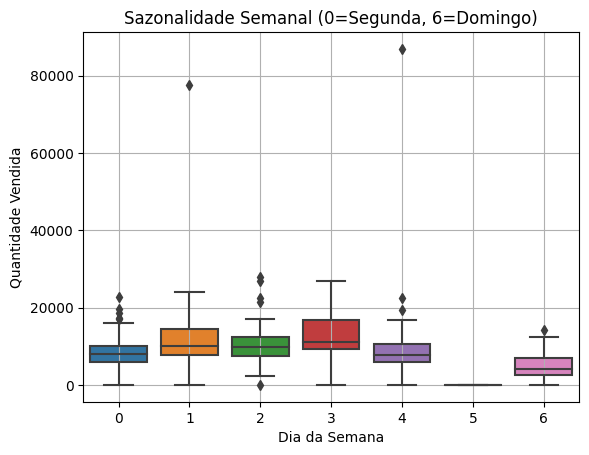

In [89]:
# Comentário já existente no código (mantido)
# 4 Boxplot da sazonalidade semanal
# Atribui/atualiza a variável 'sns.boxplot(x'
sns.boxplot(x='weekday', y='Quantity', data=df_box)
# Comandos de plotagem com Matplotlib
plt.title('Sazonalidade Semanal (0=Segunda, 6=Domingo)')
# Comandos de plotagem com Matplotlib
plt.xlabel('Dia da Semana')
# Comandos de plotagem com Matplotlib
plt.ylabel('Quantidade Vendida')
# Comandos de plotagem com Matplotlib
plt.grid(True)
# Comandos de plotagem com Matplotlib
plt.show()

In [90]:
# Comentário já existente no código (mantido)
# Vendas diárias (agregado)
# Atribui/atualiza a variável 'df_daily'
df_daily = df.set_index('InvoiceDate').resample('D')['Quantity'].sum()
# Atribui/atualiza a variável 'df_daily'
df_daily = df_daily.fillna(0)

In [91]:
# Comentário já existente no código (mantido)
# 5. Teste de Estacionariedade (ADF)
# Atribui/atualiza a variável 'adf_result'
adf_result = adfuller(df_daily)  # <- usar diretamente a série
# Linha de código Python executável
print("Teste de Dickey-Fuller Aumentado (ADF):")
# Atribui/atualiza a variável 'print(f"ADF Statistic'
print(f"ADF Statistic = {adf_result[0]:.4f}")
# Atribui/atualiza a variável 'print(f"p-value'
print(f"p-value = {adf_result[1]:.4f}")
# Linha de código Python executável
print("Conclusão: " + ("A série é estacionária." if adf_result[1] < 0.05 else "A série NÃO é estacionária."))

Teste de Dickey-Fuller Aumentado (ADF):
ADF Statistic = -1.3758
p-value = 0.5938
Conclusão: A série NÃO é estacionária.


C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


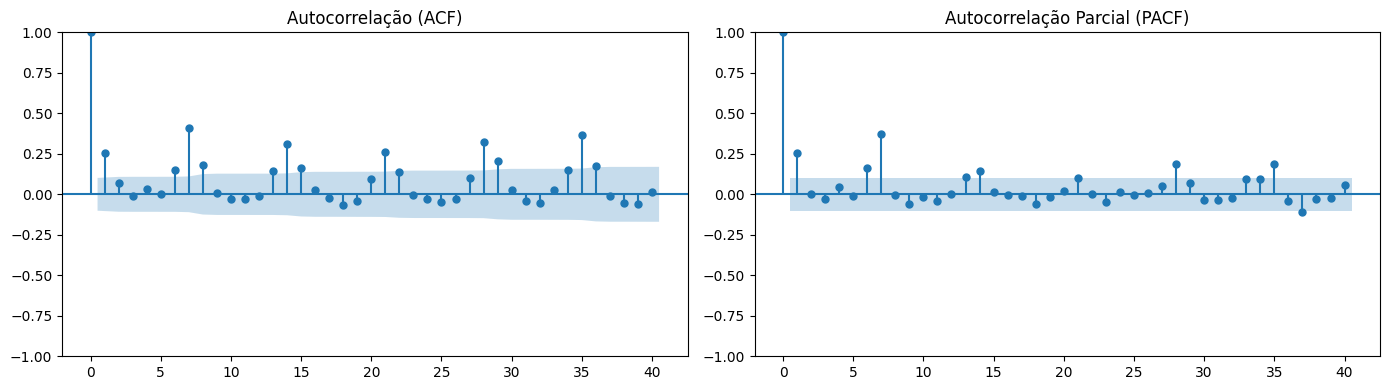

In [92]:
# Comentário já existente no código (mantido)
# 6. Autocorrelação (ACF) e Parcial (PACF)
# Comandos de plotagem com Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
# Atribui/atualiza a variável 'plot_acf(df_daily, lags'
plot_acf(df_daily, lags=40, ax=axes[0])
# Atribui/atualiza a variável 'plot_pacf(df_daily, lags'
plot_pacf(df_daily, lags=40, ax=axes[1])
# Linha de código Python executável
axes[0].set_title('Autocorrelação (ACF)')
# Linha de código Python executável
axes[1].set_title('Autocorrelação Parcial (PACF)')
# Comandos de plotagem com Matplotlib
plt.tight_layout()
# Comandos de plotagem com Matplotlib
plt.show()

Iterpretação do ACF(AutoCorrelação):
    Reparem que o Lag 1 é altíssimo (0.95), o que é normal em séries temporais com persistência. A AutoCorrelação com o valor anterior é forte.
    Após o Lag 1, os demais em sua maioria permanecem dentro do intervalo de confiança (zona azulada transparente), indicando baixa significância estatística. Apenas alguns Lags ficaram fora.
    Ou seja, a série pode ter algum nível de autocorrelação, maiorias não fortemente estruturada após o Lag 1, o que pode significar volatilidade e/ou ruído.
Iterpretação do PACF(Autocorrelação Parcial):
    Lag 1 também muito alto (~0.95), indicando forte relação direta com o valor anterior.
    O Lag 2 e principalmente o Lag 7 apresentam valores um pouco fora da faixa, demonstrando algum nível de significância estatística.

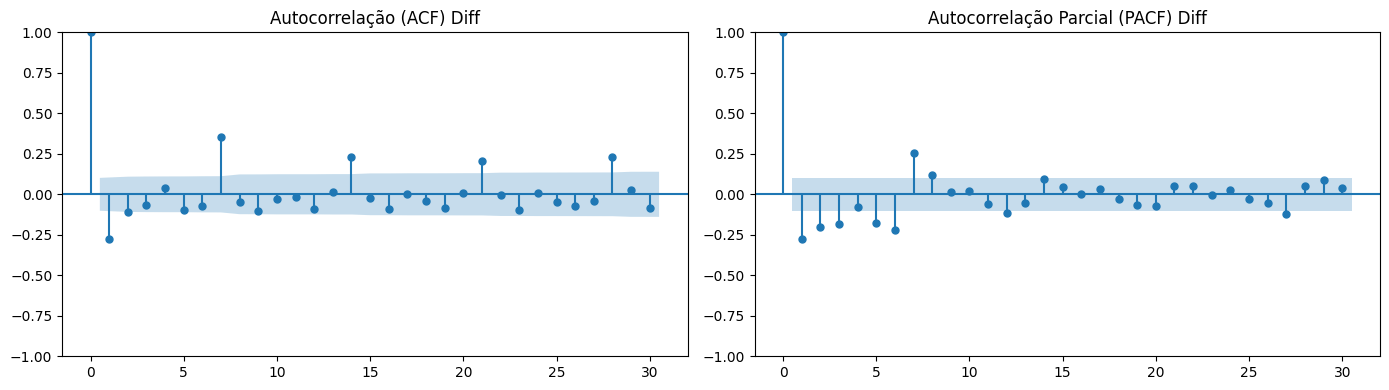

In [93]:
# Comentário já existente no código (mantido)
# #ajustando a não-estacionaridade da série
# Comentário já existente no código (mantido)
# plot_pacf(df_daily.diff().dropna())
# Comentário já existente no código (mantido)
# plot_acf(df_daily.diff().dropna())

# Comentário já existente no código (mantido)
#ajustando a não-estacionaridade da série
# Comandos de plotagem com Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
# Atribui/atualiza a variável 'plot_acf(df_daily.diff().dropna(), lags'
plot_acf(df_daily.diff().dropna(), lags=30, ax=axes[0])
# Atribui/atualiza a variável 'plot_pacf(df_daily.diff().dropna(), lags'
plot_pacf(df_daily.diff().dropna(), lags=30, ax=axes[1])
# Linha de código Python executável
axes[0].set_title('Autocorrelação (ACF) Diff')
# Linha de código Python executável
axes[1].set_title('Autocorrelação Parcial (PACF) Diff')
# Comandos de plotagem com Matplotlib
plt.tight_layout()
# Comandos de plotagem com Matplotlib
plt.show()

In [94]:
# Linha de código Python executável
Interpretação:
# Linha de código Python executável
    Tanto o ACF quanto o PACF indicam forte autocorrelalção para o Lag 1, e o resto logo decae para valores dentro do intervalo de confiança.
# Linha de código Python executável
    Tanto o ACF quanto o PACF indicam Lag 7 fora da faixa demonstra alguma significância estatística.
# Linha de código Python executável
    Logo, pequenos Lags (1 ou 2) devem ser suficientes para essa série, ou no máximo Lag 7.
# Linha de código Python executável
    Para AR Lag 1 ou Lag 2 e para MA Lag 1 ou Lag 2 também, ou eventualmente testar o Lag 7.
# Linha de código Python executável
    Na prática as ordens dos modelos poderiam ser: ARMA(1,1) ou ARMA(2,2), ARIMA(1,1,1) ou ARIMA(2,1,2)

SyntaxError: invalid syntax (726242664.py, line 1)

In [95]:
# Atribui/atualiza a variável 'df_daily'
df_daily = df.set_index('InvoiceDate').resample('D')['Quantity'].sum().to_frame()

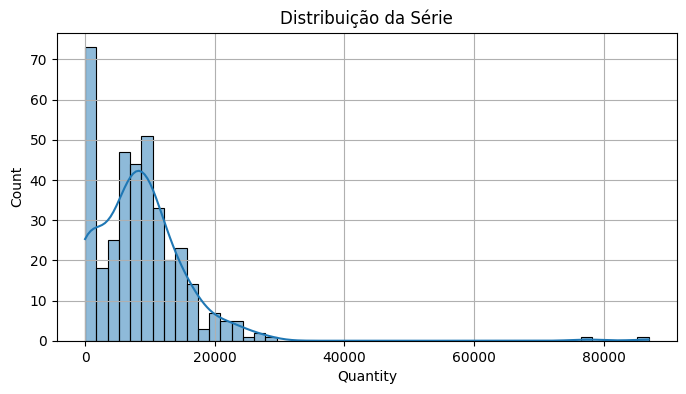

In [96]:
# Comentário já existente no código (mantido)
# 7. Histograma da série
# Comandos de plotagem com Matplotlib
plt.figure(figsize=(8, 4))
# Atribui/atualiza a variável 'sns.histplot(df_daily['Quantity'], bins'
sns.histplot(df_daily['Quantity'], bins=50, kde=True)
# Comandos de plotagem com Matplotlib
plt.title("Distribuição da Série")
# Comandos de plotagem com Matplotlib
plt.grid(True)
# Comandos de plotagem com Matplotlib
plt.show()

O que observamos:

    Assimetria à direita (distribuição enviesada positiva)
    A maior parte dos valores está concentrada entre 0 e 20.000.
    Há uma cauda longa que se estende até mais de 80.000 unidades, indicando a presença de outliers (valores extremos e raros).
    Moda visivelmente baixa
    O pico da distribuição está entre 0 e 5.000, ou seja, a maioria dos dias tem vendas baixas.
    Isso mostra uma alta frequência de dias com baixa demanda, o que é comum em séries de vendas.
    Distribuição não-normal
    A forma da curva e a cauda longa à direita indicam que a distribuição não é simétrica nem gaussiana.
    Isso pode ser confirmado com QQ plot ou testes de normalidade como Shapiro-Wilk.

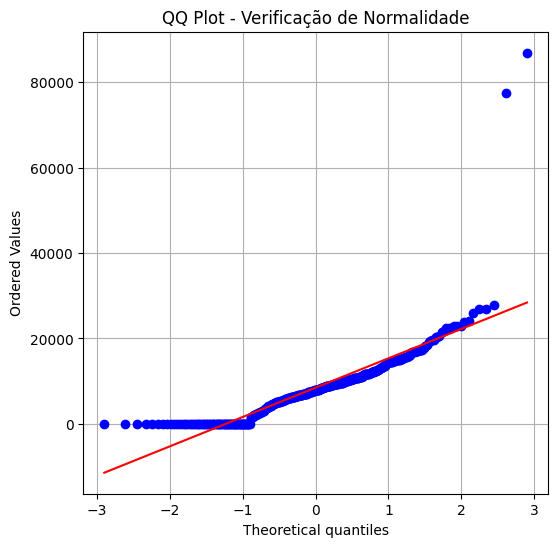

In [97]:
# Comentário já existente no código (mantido)
# 8. QQ Plot (avalia distribuição normal)
# Comandos de plotagem com Matplotlib
plt.figure(figsize=(6, 6))
# Atribui/atualiza a variável 'probplot(df_daily['Quantity'], dist'
probplot(df_daily['Quantity'], dist='norm', plot=plt)
# Comandos de plotagem com Matplotlib
plt.title('QQ Plot - Verificação de Normalidade')
# Comandos de plotagem com Matplotlib
plt.grid(True)
# Comandos de plotagem com Matplotlib
plt.show()

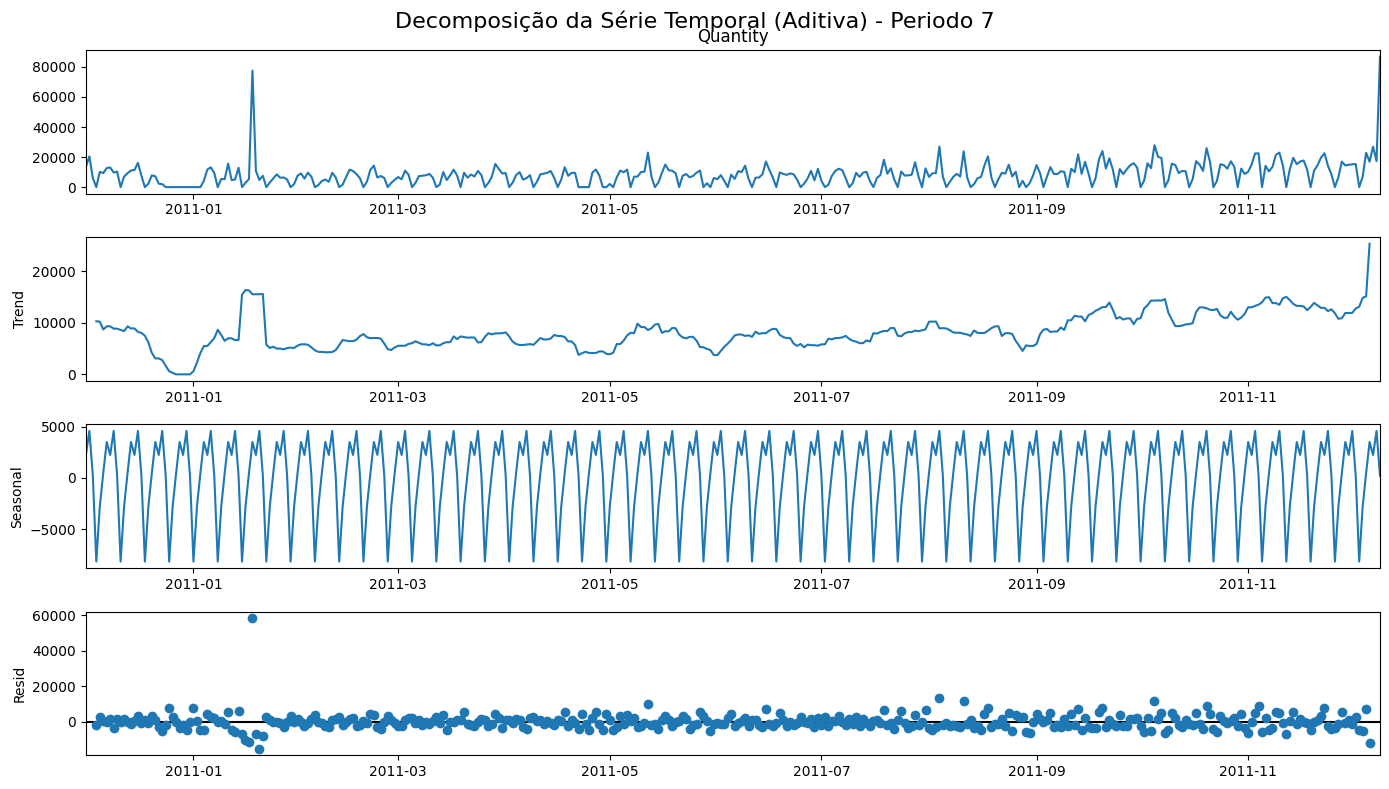

In [98]:
# Comentário já existente no código (mantido)
# Se ainda não for DataFrame, converta:
# Testa uma condição (if)
if isinstance(df_daily, pd.Series):
# Atribui/atualiza a variável 'df_daily'
    df_daily = df_daily.to_frame(name='Quantity')

# Comentário já existente no código (mantido)
# Decomposição aditiva
# Atribui/atualiza a variável 'decomp'
decomp = seasonal_decompose(df_daily['Quantity'], model='additive', period=7)  # semanal

# Comentário já existente no código (mantido)
# Plotar
# Gera um gráfico a partir dos dados
fig = decomp.plot()
# Linha de código Python executável
fig.set_size_inches(14, 8)
# Atribui/atualiza a variável 'fig.suptitle('Decomposição da Série Temporal (Aditiva) - Periodo 7', fontsize'
fig.suptitle('Decomposição da Série Temporal (Aditiva) - Periodo 7', fontsize=16)
# Comandos de plotagem com Matplotlib
plt.tight_layout()
# Comandos de plotagem com Matplotlib
plt.subplots_adjust(top=0.93)  # espaço pro título
# Comandos de plotagem com Matplotlib
plt.show()

Interpretação da Decomposição Aditiva:

    1. Observed (Série original)
    No topo do gráfico: série completa com todos os seus elementos misturados (tendência, sazonalidade, ruído).
    Você pode ver dois picos anômalos: um em janeiro e outro no final de dezembro, reforçando o que vimos antes sobre outliers importantes.
    A série tem variabilidade crescente ao longo do ano.

    2. Trend (Tendência)
    A tendência mostra uma trajetória geral ascendente, com queda no início do ano.
    Recuperação e leve crescimento até o fim do ano.
    Um salto abrupto no final, refletindo o spike de dezembro.
    Ela parece razoavelmente suave e estável, mas afetada pelos picos extremos.

    3. Seasonal (Sazonalidade)
    A sazonalidade é claramente semanal, com um padrão cíclico de 7 dias.
    O gráfico mostra um ritmo de alta-baixa recorrente, o que valida a escolha de period=7.
    A amplitude sazonal é constante (~±5000), o que justifica o uso do modelo aditivo (e não multiplicativo).
    
    4. Residual (Resíduo / Ruído)
    Os resíduos (observado − tendência − sazonalidade) mostram.
    Muitos valores próximos de zero → bom sinal.
    
    Implicações práticas: 1) Qualquer modelo que se aplique em modo "aditivo". 2) No modelo SARIMA poderíamos ter o L=7: SARIMA(p,d,q)(P,D,Q,7)

    Dois outliers extremos: um em janeiro e outro em dezembro (os mesmos picos de antes), o que significa que nem a tendência nem a sazonalidade poderiam 
    explicar esses eventos.

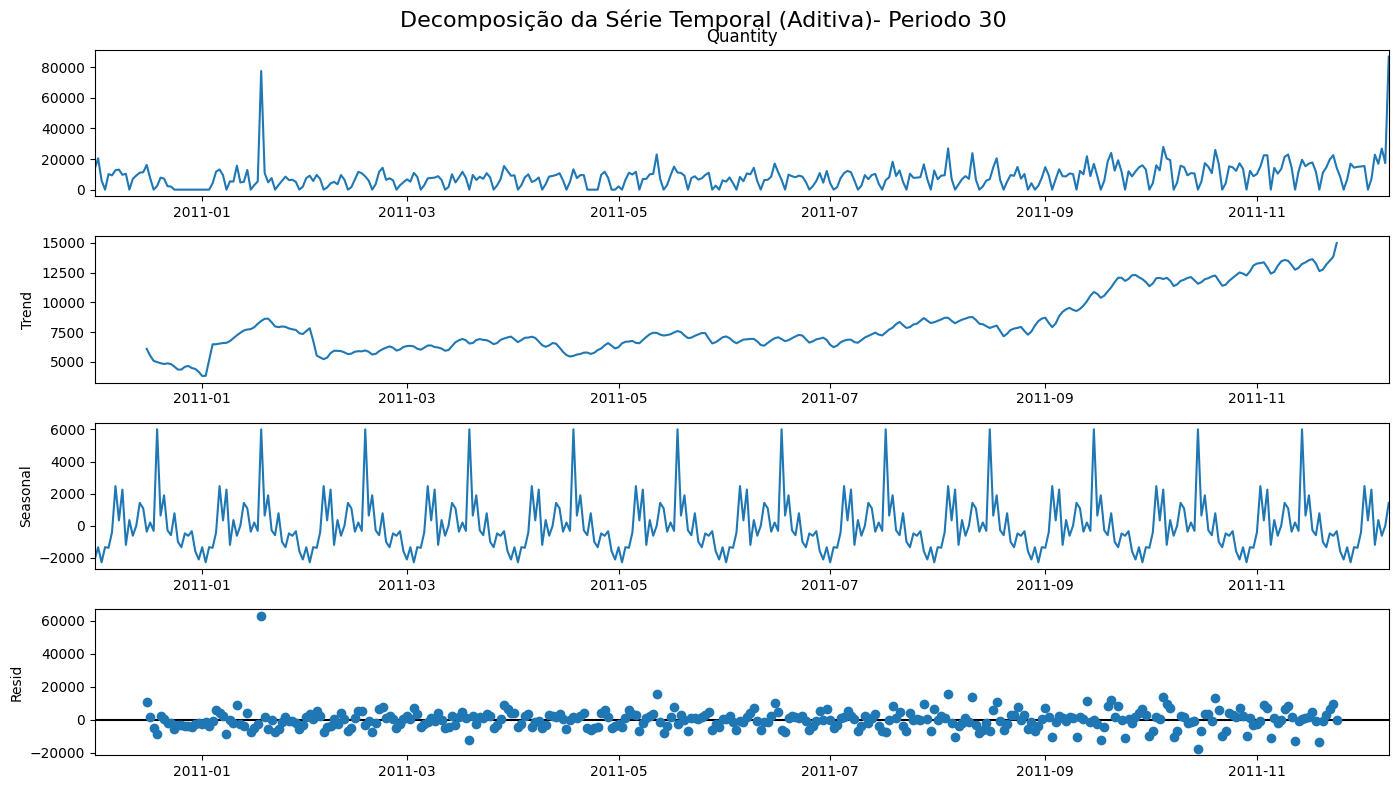

In [99]:
# Comentário já existente no código (mantido)
# Se ainda não for DataFrame, converta:
# Testa uma condição (if)
if isinstance(df_daily, pd.Series):
# Atribui/atualiza a variável 'df_daily'
    df_daily = df_daily.to_frame(name='Quantity')

# Comentário já existente no código (mantido)
# Decomposição aditiva
# Atribui/atualiza a variável 'decomp'
decomp = seasonal_decompose(df_daily['Quantity'], model='additive', period=30)  # mensal

# Comentário já existente no código (mantido)
# Plotar
# Gera um gráfico a partir dos dados
fig = decomp.plot()
# Linha de código Python executável
fig.set_size_inches(14, 8)
# Atribui/atualiza a variável 'fig.suptitle('Decomposição da Série Temporal (Aditiva)- Periodo 30', fontsize'
fig.suptitle('Decomposição da Série Temporal (Aditiva)- Periodo 30', fontsize=16)
# Comandos de plotagem com Matplotlib
plt.tight_layout()
# Comandos de plotagem com Matplotlib
plt.subplots_adjust(top=0.93)  # espaço pro título
# Comandos de plotagem com Matplotlib
plt.show()

In [100]:
# Linha de código Python executável
Interpretação:
# Linha de código Python executável
    Com um período de 30 dias(sazonalidade mensal) a tendência de crescimento contínuo ao longo do ano ficou mais clara e suavizada.    

SyntaxError: invalid syntax (491845243.py, line 1)

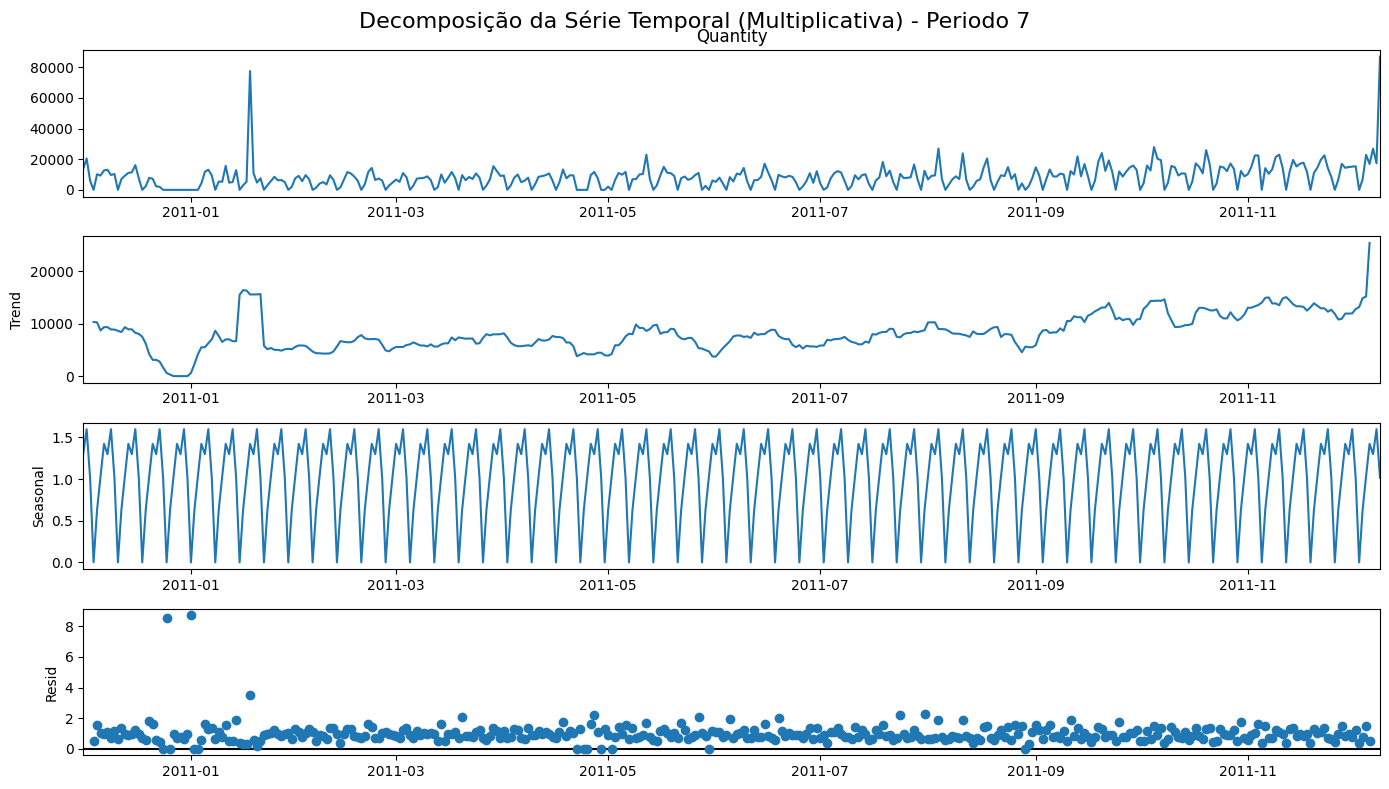

In [101]:
# Comentário já existente no código (mantido)
# Se ainda não for DataFrame, converta:
# Testa uma condição (if)
if isinstance(df_daily, pd.Series):
# Atribui/atualiza a variável 'df_daily'
    df_daily = df_daily.to_frame(name='Quantity')

# Comentário já existente no código (mantido)
# Substituir zeros (ou negativos, se houver) por um valor muito pequeno
# Atribui/atualiza a variável 'df_daily['Quantity']'
df_daily['Quantity'] = df_daily['Quantity'].apply(lambda x: x if x > 0 else 1e-3)

# Comentário já existente no código (mantido)
# Decomposição multiplicativa
# Atribui/atualiza a variável 'decomp'
decomp = seasonal_decompose(df_daily['Quantity'], model='multiplicative', period=7)  # semanal

# Comentário já existente no código (mantido)
# Plotar
# Gera um gráfico a partir dos dados
fig = decomp.plot()
# Linha de código Python executável
fig.set_size_inches(14, 8)
# Atribui/atualiza a variável 'fig.suptitle('Decomposição da Série Temporal (Multiplicativa) - Periodo 7', fontsize'
fig.suptitle('Decomposição da Série Temporal (Multiplicativa) - Periodo 7', fontsize=16)
# Comandos de plotagem com Matplotlib
plt.tight_layout()
# Comandos de plotagem com Matplotlib
plt.subplots_adjust(top=0.93)
# Comandos de plotagem com Matplotlib
plt.show()

Interpretação da Decomposição Multiplicativa:

    1. Observed (Série Original)
    A série base é a mesma que já analisamos: flutuações diárias, tendência crescente, picos extremos (especialmente em janeiro e dezembro).

    2. Trend (Tendência)
    A tendência está muito semelhante à versão aditiva: crescimento gradual com influência dos outliers.
    O crescimento de longo prazo é visível, com uma aceleração no fim do ano.

    3. Seasonal (Sazonalidade - multiplicativa)
    A componente sazonal varia entre ~0.4 e ~1.6, o que indica que:
    Em certos dias da semana, o valor observado é até 60% maior ou 60% menor do que a média (quando a componente vale 1).
    Isso sugere uma sazonalidade proporcional ao nível da série, e não constante como no modelo aditivo.
    
    4. Residual
    Vemos poucos valores muito distantes de 1, com a maioria dos resíduos flutuando entre 0.5 e 1.5, exceto em pontos com outliers.
    Os maiores desvios ocorrem novamente em janeiro e dezembro.
    Boa dispersão geral, mas ainda com ruídos e picos.

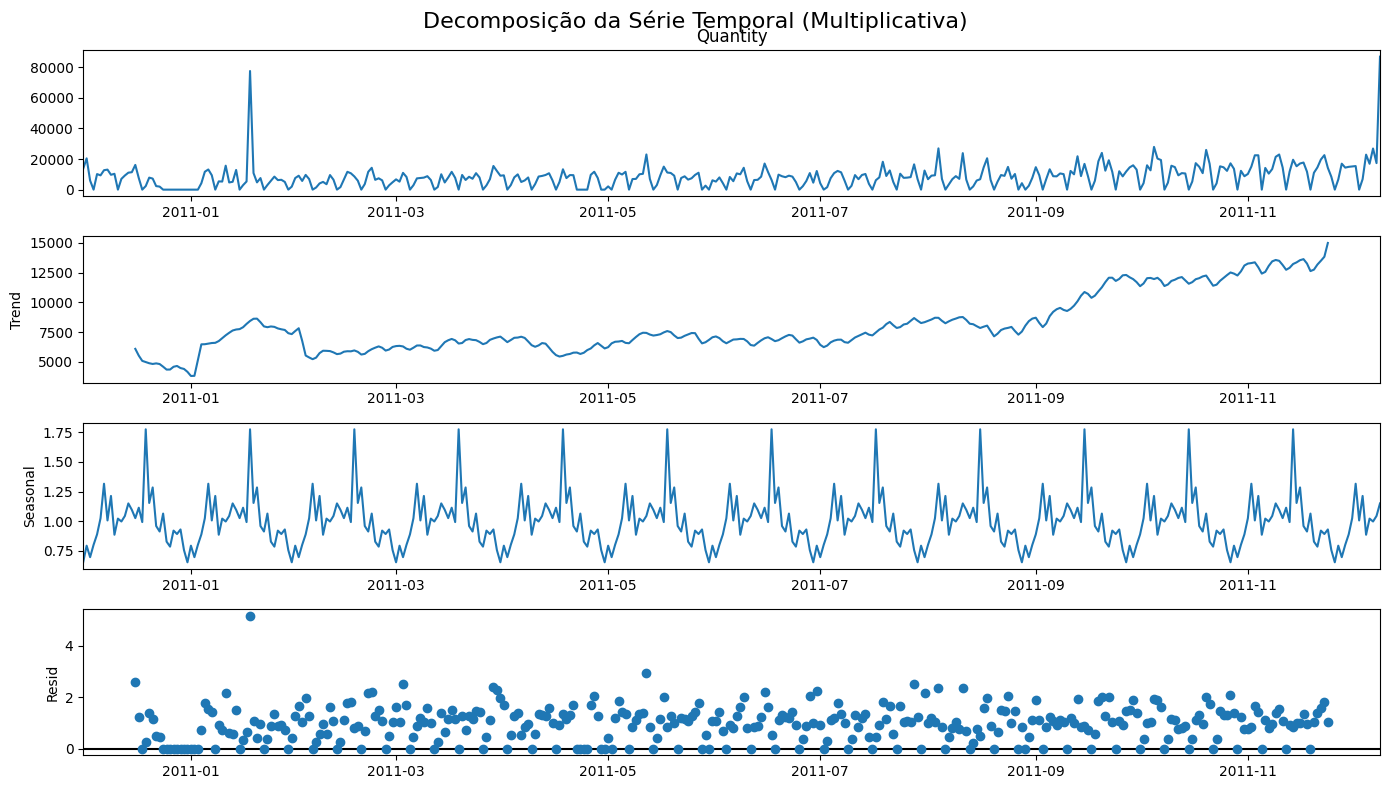

In [102]:
# Comentário já existente no código (mantido)
# Se ainda não for DataFrame, converta:
# Testa uma condição (if)
if isinstance(df_daily, pd.Series):
# Atribui/atualiza a variável 'df_daily'
    df_daily = df_daily.to_frame(name='Quantity')

# Comentário já existente no código (mantido)
# Substituir zeros (ou negativos, se houver) por um valor muito pequeno
# Atribui/atualiza a variável 'df_daily['Quantity']'
df_daily['Quantity'] = df_daily['Quantity'].apply(lambda x: x if x > 0 else 1e-3)

# Comentário já existente no código (mantido)
# Decomposição multiplicativa
# Atribui/atualiza a variável 'decomp'
decomp = seasonal_decompose(df_daily['Quantity'], model='multiplicative - Periodo 30', period=30)  # semanal

# Comentário já existente no código (mantido)
# Plotar
# Gera um gráfico a partir dos dados
fig = decomp.plot()
# Linha de código Python executável
fig.set_size_inches(14, 8)
# Atribui/atualiza a variável 'fig.suptitle('Decomposição da Série Temporal (Multiplicativa)', fontsize'
fig.suptitle('Decomposição da Série Temporal (Multiplicativa)', fontsize=16)
# Comandos de plotagem com Matplotlib
plt.tight_layout()
# Comandos de plotagem com Matplotlib
plt.subplots_adjust(top=0.93)
# Comandos de plotagem com Matplotlib
plt.show()

### Modelagem Clássica de Séries Temporais

In [103]:
# Comentário já existente no código (mantido)
# Certifique-se de usar apenas a série de valores, não o DataFrame completo
# Atribui/atualiza a variável 'y'
y = df_daily['Quantity'].fillna(0)  # Agora é Series

In [104]:
# Comentário já existente no código (mantido)
# Modelo AutoRegressivo com 5 defasagens
# Treina/ajusta o modelo com os dados
model_ar = AutoReg(y, lags=5).fit()

# Comentário já existente no código (mantido)
# Resumo
# Linha de código Python executável
print("AR Model Summary:\n", model_ar.summary())

AR Model Summary:
                             AutoReg Model Results                             
Dep. Variable:               Quantity   No. Observations:                  374
Model:                     AutoReg(5)   Log Likelihood               -3827.760
Method:               Conditional MLE   S.D. of innovations           7741.847
Date:                Wed, 26 Mar 2025   AIC                           7669.521
Time:                        14:33:14   BIC                           7696.896
Sample:                    12-06-2010   HQIC                          7680.396
                         - 12-09-2011                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5396.6705    985.567      5.476      0.000    3464.995    7328.345
Quantity.L1     0.3423      0.060      5.658      0.000       0.224       0.461
Quantity.L2     0.0052      0

In [105]:
# Linha de código Python executável
Interpretação AR(Lag5):
# Linha de código Python executável
    AIC e BIC são relativamente altos
# Linha de código Python executável
    Apenas o Lag 1(Quantity.L1) tem significância estatística (p_value < 0.05), os outros Lags não tem relevância para o modelo.

SyntaxError: invalid syntax (1694303424.py, line 1)

In [106]:
# Comentário já existente no código (mantido)
# Modelo AutoRegressivo com 7 defasagens
# Treina/ajusta o modelo com os dados
model_ar = AutoReg(y, lags=7).fit()

# Comentário já existente no código (mantido)
# Resumo
# Linha de código Python executável
print("AR Model Summary:\n", model_ar.summary())

AR Model Summary:
                             AutoReg Model Results                             
Dep. Variable:               Quantity   No. Observations:                  374
Model:                     AutoReg(7)   Log Likelihood               -3765.484
Method:               Conditional MLE   S.D. of innovations           6913.538
Date:                Wed, 26 Mar 2025   AIC                           7548.969
Time:                        14:33:16   BIC                           7584.117
Sample:                    12-08-2010   HQIC                          7562.934
                         - 12-09-2011                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1545.9641    985.674      1.568      0.117    -385.922    3477.850
Quantity.L1     0.2129      0.056      3.807      0.000       0.103       0.323
Quantity.L2     0.0367      0

In [107]:
# Linha de código Python executável
Interpretação AR(lag7):
# Linha de código Python executável
    Em termos de AIC e BIC os valores são mais baixos (melhores) do que foram para Lag5
# Linha de código Python executável
    Alguns Lags demonstraram ter significância estatística (p_value < 0.05): L1 e L7    
# Linha de código Python executável
    O Lag7 (Quantity.L7) é muito forte para o modelo

SyntaxError: invalid syntax (1015284317.py, line 1)

In [108]:
# Atribui/atualiza a variável 'order'
order=(2, 0, 2)
# Atribui/atualiza a variável 'order'
order=(p, d, q)
# Linha de código Python executável
p: Número de lags (defasagens)
# Linha de código Python executável
d: Número de Diferenciações (para gerar estacionaridade)
# Linha de código Python executável
q: Número de lags do erro (defasagens dos resíduos passados entre previsto e real)

SyntaxError: invalid syntax (2875104739.py, line 3)

In [109]:
# Comentário já existente no código (mantido)
# --- 5. ARIMA (p=2, q=2) ---
# Comentário já existente no código (mantido)
# ARMA não aceita série não estacionária, por isso diferenciamos
# Atribui/atualiza a variável 'y_diff'
y_diff = y.diff().dropna()
# Treina/ajusta o modelo com os dados
arma_model = ARIMA(y_diff, order=(2, 0, 2)).fit()
# Linha de código Python executável
print("ARMA Model Summary:\n", arma_model.summary())

C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  373
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3860.245
Date:                Wed, 26 Mar 2025   AIC                           7732.490
Time:                        14:33:25   BIC                           7756.019
Sample:                    12-02-2010   HQIC                          7741.833
                         - 12-09-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9241     21.605      0.691      0.490     -27.420      57.268
ar.L1          0.6464      0.319      2.027      0.043       0.021       1.271
ar.L2         -0.2804      0.08

C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
# Linha de código Python executável
Interpretação:
# Linha de código Python executável
    AIC e BIC piores que os modelos anteriores.
# Linha de código Python executável
    Para o AR: o Lag1 e Lag2 (ar.L1 e ar.L2) demonstram significancia estatística (p_value < 0.05), para o MA: Apenas o Lag1 (ma.L1) contrubui significativamente (P<0.05) 
# Linha de código Python executável
    para o modelo 

SyntaxError: invalid syntax (2674516142.py, line 1)

In [111]:
# Atribui/atualiza a variável 'Exemplo: ARIMA order'
Exemplo: ARIMA order=(2, 0, 2)
# Atribui/atualiza a variável 'yt'
yt= ϕ1yt-1 + ϕ2yt-2 + θ1εt−1 + θ2εt−2 + εt

SyntaxError: invalid syntax (1489883440.py, line 1)

In [112]:
# Atribui/atualiza a variável 'order'
order=(2, 1, 2)
# Atribui/atualiza a variável 'order'
order=(p,d,q)
# Linha de código Python executável
Ordens:
# Linha de código Python executável
p->AR(AutoRegressao)
# Linha de código Python executável
d->Diferenciação(Integração)
# Linha de código Python executável
q->MediaMovel(MA)

SyntaxError: invalid syntax (1572477170.py, line 3)

In [113]:
# Comentário já existente no código (mantido)
# --- 6. ARIMA (p=2, d=1, q=2) ---
# Treina/ajusta o modelo com os dados
arima_model = ARIMA(y, order=(2, 1, 2)).fit() #Diferenciação nível 1 sobre a série de valores original (não siferenciada até aqui)
# Linha de código Python executável
print("ARIMA Model Summary:\n", arima_model.summary())

C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  374
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3863.451
Date:                Wed, 26 Mar 2025   AIC                           7736.902
Time:                        14:33:29   BIC                           7756.509
Sample:                    12-01-2010   HQIC                          7744.688
                         - 12-09-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6771      0.170     -3.984      0.000      -1.010      -0.344
ar.L2          0.1867      0.084      2.224      0.026       0.022       0.351
ma.L1         -0.0492      0.1

In [114]:
# Atribui/atualiza a variável 'Interpretação ARIMA com order'
Interpretação ARIMA com order=(2, 1, 2):
# Linha de código Python executável
    AIC e BIC insatisfatórios
# Linha de código Python executável
    Para o AR os Lag1 e Lag2 tem relevancia estatística (P< 0.05) e para o MA apenas o Lag2 tem significancia estatística (P<0.05)
# Linha de código Python executável
    Apesar disso, o modelo apresenta mensagens indicando problemas na obtenção da solução, o que torna o modelo duvidoso ou instável.

SyntaxError: invalid syntax (1811143994.py, line 1)

In [115]:
# Linha de código Python executável
Outros exemplos:
# Atribui/atualiza a variável 'order'
order=(1, 1, 1) → ARIMA(1,1,1): usa 1 lag, 1 diferenciação, 1 erro MA
# Atribui/atualiza a variável 'order'
order=(0, 1, 1) → Modelo MA sobre uma série diferenciada
# Atribui/atualiza a variável 'order'
order=(2, 0, 0) → AR(2), puro autoregressivo, sem erro MA nem integração (diferenciação)

SyntaxError: invalid syntax (391888078.py, line 1)

In [116]:
# Linha de código Python executável
Exemplo Sarima:
# Atribui/atualiza a variável 'order'
order = (2, 1, 2)
# Atribui/atualiza a variável 'order'
order = (p,d, q)

# Atribui/atualiza a variável 'seasonal_order'
seasonal_order=(1, 1, 1, 12)
# Atribui/atualiza a variável 'seasonal_order'
seasonal_order=(P, D, Q, L)

# Linha de código Python executável
Estrutura do modelo:
# Atribui/atualiza a variável 'order'
    order=(2,1,2): parte não sazonal
# Linha de código Python executável
    AR(2), integração de ordem 1, MA(2)
    
# Atribui/atualiza a variável 'seasonal_order'
    seasonal_order=(1,1,1,12): parte sazonal mensal
# Linha de código Python executável
    AR sazonal(1), diferença sazonal(1), MA sazonal(1), com sazonalidade de 12 períodos (mensal)

SyntaxError: invalid syntax (558009474.py, line 1)

In [117]:
# Comentário já existente no código (mantido)
# --- 7. SARIMA (p,d,q)(P,D,Q,s) ---
# Treina/ajusta o modelo com os dados
sarima_model = SARIMAX(y, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
# Linha de código Python executável
print("SARIMA Model Summary:\n", sarima_model.summary())

C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:                             Quantity   No. Observations:                  374
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -3781.933
Date:                              Wed, 26 Mar 2025   AIC                           7577.867
Time:                                      14:33:34   BIC                           7605.089
Sample:                                  12-01-2010   HQIC                          7588.690
                                       - 12-09-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6658      0.783     -0.850      0.395      -2.201       0.

In [118]:
# Linha de código Python executável
Interpretação:
# Linha de código Python executável
    AIC é o melhor até apresentado aqui entre todos os modelos, o BIC é razoável.
# Linha de código Python executável
    Apenas uma variável foi significativa para o modelo: Lag12 da média sazonal (ma.S.L12) que teve P < 0.05
# Linha de código Python executável
    Apesar disso, o modelo apresenta mensagens indicando problemas na obtenção da solução, o que torna o modelo duvidoso ou instável.

SyntaxError: invalid syntax (3188411691.py, line 1)

In [ ]:
# Comentário já existente no código (mantido)
# --- 7. SARIMA (p,d,q)(P,D,Q,s) ---
# Treina/ajusta o modelo com os dados
sarima_model = SARIMAX(y, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
# Linha de código Python executável
print("SARIMA Model Summary:\n", sarima_model.summary())

Interpretação do ARIMA order():
    
    Foi o melhor AIC até agora entre todos os modelos testados:
    ARIMA(2,1,2) → AIC ≈ 7736
    SARIMA(2,1,2)(1,1,1,12) → AIC ≈ 7577
    AR(7) → AIC ≈ 7548
    ARMA(2,2) → AIC ≈ 7732
    
    Melhor ajuste global AIC/BIC entre todos os modelos.
    
    Apenas 2 variáveis foram relevantes até aqui:
        Para AR apenas o Lag7(ar.S.L7) teve significancia estatística (p_value < 0.05)
        Para MA apenas o Lag7(ma.S.L7) teve significancia estatística (p_value < 0.05)

In [119]:
# Comentário já existente no código (mantido)
# --- 7. SARIMA (p,d,q)(P,D,Q,s) ---
# Treina/ajusta o modelo com os dados
sarima_model = SARIMAX(y, order=(2, 1, 2), seasonal_order=(1, 1, 1, 30)).fit()
# Linha de código Python executável
print("SARIMA Model Summary:\n", sarima_model.summary())

C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:                             Quantity   No. Observations:                  374
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood               -3593.538
Date:                              Wed, 26 Mar 2025   AIC                           7201.075
Time:                                      14:33:51   BIC                           7227.940
Sample:                                  12-01-2010   HQIC                          7211.776
                                       - 12-09-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0419      1.395     -0.030      0.976      -2.776       2.

Interpretação SARIMAX:

    Foram os menores (melhores) AIC e BIC: AIC = 7201.075
    Melhor que o SARIMA(2,1,2)(1,1,1,7) que tinha AIC ≈ 7523
    Apesar de ter um bom ajuste, nenhuma variável Lag foi relevante para o modelo.    
    
    ALGUMAS VIOLAÇÕES ACONTECERAM:
        "Non-stationary starting autoregressive parameters": os parâmetros AR iniciais não satisfazem a condição de estacionariedade.
        "Non-invertible starting MA parameters": os parâmetros MA iniciais não permitem a condição de inverter a matriz para gerar a solução (vide aula teórica)
        "Maximum Likelihood optimization failed to converge": a otimização estatística falhou (vide aula teórica), os parâmetros estimados não necessariamente maximizam a 
        verossimilhança.
        "Covariance matrix is singular or near-singular": Pode haver número excessivo de parâmetros.
        
    Todos os fatores citados levam a instabilidade de solução: o modelo avaliado não possue confiabilidade para ser usado.

In [120]:
# Comentário já existente no código (mantido)
# --- 8. Exponential Smoothing ---
# Treina/ajusta o modelo com os dados
exp_model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit()
# Linha de código Python executável
print("Exponential Smoothing Summary:\n")
# Linha de código Python executável
print(f"AIC: {exp_model.aic:.2f}, BIC: {exp_model.bic:.2f}")

Exponential Smoothing Summary:

AIC: 6763.56, BIC: 6826.35


C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [121]:
# Linha de código Python executável
Interpretação Suavização Exponencial(Lag12):
# Linha de código Python executável
    Foram os menores (melhores) AIC e BIC entre todos os modelos até aqui.
# Linha de código Python executável
    "Optimization failed to converge. Check mle_retvals.": O algoritmo de otimização que estima os parâmetros não encontrou uma esolução estável. Os parâmetros do modelo podem não ser os ideais, e as previsões podem não ser confiáveis.
# Linha de código Python executável
    O Modelo não possui confiabilidade e não pode ser considerado.

SyntaxError: invalid syntax (3825630700.py, line 1)

In [122]:
# Comentário já existente no código (mantido)
# --- 8. Exponential Smoothing ---
# Treina/ajusta o modelo com os dados
exp_model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=7).fit()
# Linha de código Python executável
print("Exponential Smoothing Summary:\n")
# Linha de código Python executável
print(f"AIC: {exp_model.aic:.2f}, BIC: {exp_model.bic:.2f}")

Exponential Smoothing Summary:

AIC: 6592.68, BIC: 6635.85


C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [123]:
# Linha de código Python executável
Interpretação Suavização Exponencial(Lag7):
# Linha de código Python executável
    Foram os menores (melhores) AIC e BIC entre todos os modelos, inclusive a Suavização Exponencial Lag12
# Linha de código Python executável
    "Optimization failed to converge. Check mle_retvals.": O algoritmo de otimização que estima os parâmetros não encontrou uma esolução estável. Os parâmetros do modelo podem não ser os ideais, e as previsões podem não ser confiáveis.
# Linha de código Python executável
    O Modelo não possui confiabilidade e não pode ser considerado.    

SyntaxError: invalid syntax (2533021042.py, line 1)

In [124]:
# Comentário já existente no código (mantido)
# --- 8. Exponential Smoothing ---
# Treina/ajusta o modelo com os dados
exp_model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=30).fit()
# Linha de código Python executável
print("Exponential Smoothing Summary:\n")
# Linha de código Python executável
print(f"AIC: {exp_model.aic:.2f}, BIC: {exp_model.bic:.2f}")

Exponential Smoothing Summary:

AIC: 6775.76, BIC: 6909.19


C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [125]:
# Linha de código Python executável
Interpretação Suavização Exponencial(Lag30):
# Linha de código Python executável
    Não superou as métricas AIC e BIC obtidas por Suavização Exponencial para Lag7 ou Lag12
# Linha de código Python executável
    "Optimization failed to converge. Check mle_retvals.": O algoritmo de otimização que estima os parâmetros não encontrou uma esolução estável. Os parâmetros do modelo podem não ser os ideais, e as previsões podem não ser confiáveis.
# Linha de código Python executável
    O Modelo não possui confiabilidade e não pode ser considerado.    

SyntaxError: invalid syntax (360221425.py, line 1)

In [126]:
# Comentário já existente no código (mantido)
# --- 8. Exponential Smoothing ---
# Treina/ajusta o modelo com os dados
exp_model = ExponentialSmoothing(y, trend='mul', seasonal='mul', seasonal_periods=7).fit()
# Linha de código Python executável
print("Exponential Smoothing Summary:\n")
# Linha de código Python executável
print(f"AIC: {exp_model.aic:.2f}, BIC: {exp_model.bic:.2f}")

Exponential Smoothing Summary:

AIC: 6584.52, BIC: 6627.68


C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [127]:
# Linha de código Python executável
Interpretação Suavização Exponencial(Lag7, multiplicativo):
# Linha de código Python executável
    Superou as métricas AIC e BIC obtidas para Lag7 aditivo, foram as melhores até aqui.
# Linha de código Python executável
    "ConvergenceWarning: Optimization failed to converge. Check mle_retvals.warnings.warn(": MAS houve problema de convergência de solução, então não é confiável

SyntaxError: invalid syntax (2424461827.py, line 1)

In [128]:
# Comentário já existente no código (mantido)
# --- 9. Relatório Comparativo ---
# Atribui/atualiza a variável 'models'
models = {
# Linha de código Python executável
    'AR': model_ar,
# Linha de código Python executável
    'ARMA': arma_model,
# Linha de código Python executável
    'ARIMA': arima_model,
# Linha de código Python executável
    'SARIMA': sarima_model,
# Linha de código Python executável
    'Exp. Smoothing': exp_model
# Linha de código Python executável
    }

# Linha de código Python executável
print("\n Comparativo de Modelos Clássicos de Series Temporais:")
# Atribui/atualiza a variável 'report'
report = []
# Inicia um laço/iteração
for name, model in models.items():#unpacking
# Linha de código Python executável
    report.append({
# Linha de código Python executável
        'Modelo': name,
# Linha de código Python executável
        'AIC': model.aic,
# Linha de código Python executável
        'BIC': model.bic
# Linha de código Python executável
    })

# Atribui/atualiza a variável 'report_df'
report_df = pd.DataFrame(report).sort_values('AIC')
# Atribui/atualiza a variável 'print(report_df.to_string(index'
print(report_df.to_string(index=False))


 Comparativo de Modelos Clássicos de Series Temporais:
        Modelo         AIC         BIC
Exp. Smoothing 6584.517320 6627.684134
        SARIMA 7201.075439 7227.939552
            AR 7548.968660 7584.116917
          ARMA 7732.489901 7756.019371
         ARIMA 7736.901553 7756.509445


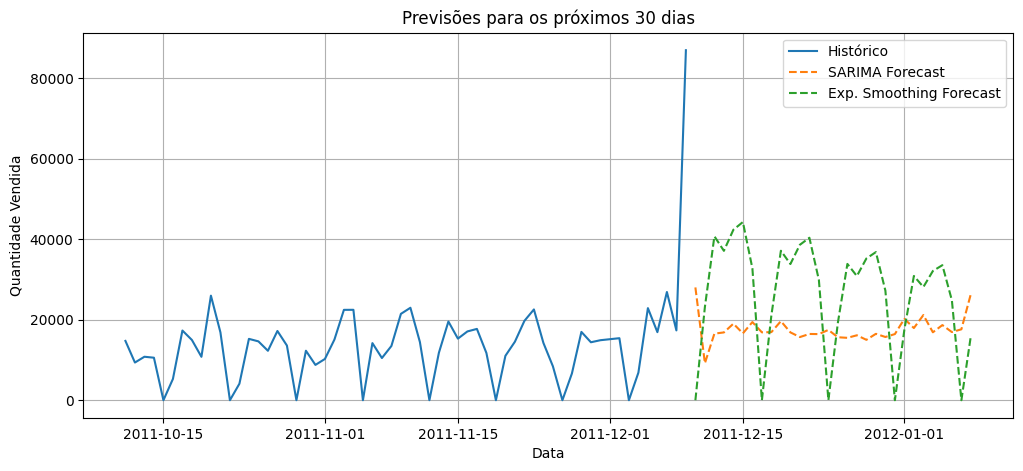

In [129]:
# Comentário já existente no código (mantido)
# --- 10. Previsões ---
# Atribui/atualiza a variável 'forecast_steps'
forecast_steps = 30
# Comandos de plotagem com Matplotlib
plt.figure(figsize=(12, 5))
# Gera um gráfico a partir dos dados
plt.plot(y[-60:], label='Histórico')
# Gera um gráfico a partir dos dados
plt.plot(y.index[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit='D'),
# Atribui/atualiza a variável 'sarima_model.forecast(forecast_steps), label'
         sarima_model.forecast(forecast_steps), label='SARIMA Forecast', linestyle='--')
# Gera um gráfico a partir dos dados
plt.plot(y.index[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit='D'),
# Atribui/atualiza a variável 'exp_model.forecast(forecast_steps), label'
         exp_model.forecast(forecast_steps), label='Exp. Smoothing Forecast', linestyle='--')
# Comandos de plotagem com Matplotlib
plt.title("Previsões para os próximos 30 dias")
# Comandos de plotagem com Matplotlib
plt.xlabel("Data")
# Comandos de plotagem com Matplotlib
plt.ylabel("Quantidade Vendida")
# Comandos de plotagem com Matplotlib
plt.legend()
# Comandos de plotagem com Matplotlib
plt.grid()
# Comandos de plotagem com Matplotlib
plt.show()

- Aplicando outras métricas para avaliar os modelos

In [130]:
# Comentário já existente no código (mantido)
# 1. Número de passos previstos
# Atribui/atualiza a variável 'forecast_days'
forecast_days = 30

In [131]:
# Comentário já existente no código (mantido)
# 2. Separar os últimos 30 dias reais (validação)
# Atribui/atualiza a variável 'y_real'
y_real = df_daily['Quantity'][-forecast_days:]

In [132]:
# Comentário já existente no código (mantido)
# 3. Gerar previsões (já foi feito antes, mas recriamos para garantir)
# Atribui/atualiza a variável 'y'
y = df_daily['Quantity']
# Treina/ajusta o modelo com os dados
model_sarima = SARIMAX(y, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
# Atribui/atualiza a variável 'sarima_pred'
sarima_pred = model_sarima.forecast(steps=forecast_days)
# Treina/ajusta o modelo com os dados
model_exp = ExponentialSmoothing(y, trend='mul', seasonal='mul', seasonal_periods=7).fit()
# Atribui/atualiza a variável 'exp_pred'
exp_pred = model_exp.forecast(steps=forecast_days)

C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\envs\canariodatascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [133]:
# Comentário já existente no código (mantido)
# 4. Calcular métricas
# Atribui/atualiza a variável 'mae_sarima'
mae_sarima = mean_absolute_error(y_real, sarima_pred)
# Opera com funções NumPy (vetorização/matrizes)
rmse_sarima = np.sqrt(mean_squared_error(y_real, sarima_pred))
# Atribui/atualiza a variável 'mae_exp'
mae_exp = mean_absolute_error(y_real, exp_pred)
# Opera com funções NumPy (vetorização/matrizes)
rmse_exp = np.sqrt(mean_squared_error(y_real, exp_pred))

In [134]:
# Comentário já existente no código (mantido)
# 5. Mostrar resultados
# Linha de código Python executável
print("Avaliação de Desempenho (últimos 30 dias reais)")
# Linha de código Python executável
print(f"SARIMA - MAE: {mae_sarima:.2f} | RMSE: {rmse_sarima:.2f}")
# Linha de código Python executável
print(f"Exp. Smoothing - MAE: {mae_exp:.2f} | RMSE: {rmse_exp:.2f}")

Avaliação de Desempenho (últimos 30 dias reais)
SARIMA - MAE: 11168.22 | RMSE: 16697.76
Exp. Smoothing - MAE: 20861.83 | RMSE: 24655.48


In [135]:
# Linha de código Python executável
df_daily['Quantity'].mean() / rmse_exp

0.3445740321352067

In [136]:
# Linha de código Python executável
8495 / 16697.76

0.5087508743687776

### FIM